# Take home challange 

## Part-1: Exploratory Data Analysis 

### Import necessary Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [2]:
logins = pd.read_json('logins.json')

### Exploratory Data Analysis on the dataset

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.shape

(93142, 1)

In [5]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


# Case-1: Logins per 15 minutes

In [6]:
logins_15mins = logins.set_index('login_time').resample('15min').size()
logins_15mins[:10]

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
1970-01-01 21:15:00    4
1970-01-01 21:30:00    0
1970-01-01 21:45:00    4
1970-01-01 22:00:00    9
1970-01-01 22:15:00    8
Freq: 15T, dtype: int64

In [7]:
type(logins_15mins)

pandas.core.series.Series

In [8]:
# Convert the series to a dataframe for further exploration
logins_15mins_dataframe = pd.DataFrame(logins_15mins, columns = ['counts'])

In [9]:
logins_15mins_dataframe.head(30)

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


In [10]:
logins_15mins_dataframe.describe()

,counts
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


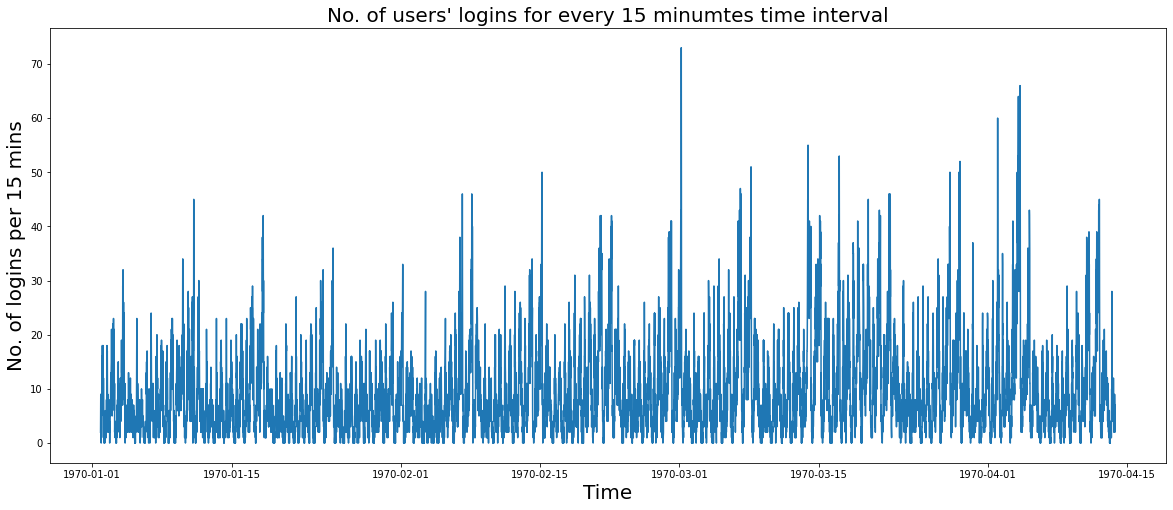

In [11]:
# Plot the number of logins for every 15 minutes
plt.figure(figsize = (20, 8))
plt.plot(logins_15mins_dataframe.index, logins_15mins_dataframe.counts)
plt.title("No. of users' logins for every 15 minumtes time interval", fontdict = {'fontsize': 20 })
plt.xlabel('Time', fontdict = {'fontsize': 20 } )
plt.ylabel('No. of logins per 15 mins', fontdict = {'fontsize': 20 })
plt.show()

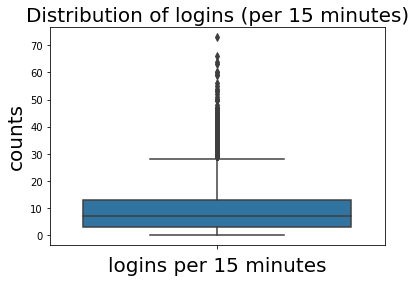

In [12]:
# Plot boxplot
sns.boxplot(y = logins_15mins_dataframe.counts, data = logins_15mins_dataframe)
plt.title("Distribution of logins (per 15 minutes)", fontdict = {'fontsize': 20 })
plt.xlabel('logins per 15 minutes', fontdict = {'fontsize': 20 })
plt.ylabel('counts', fontdict = {'fontsize': 20 })
plt.show()

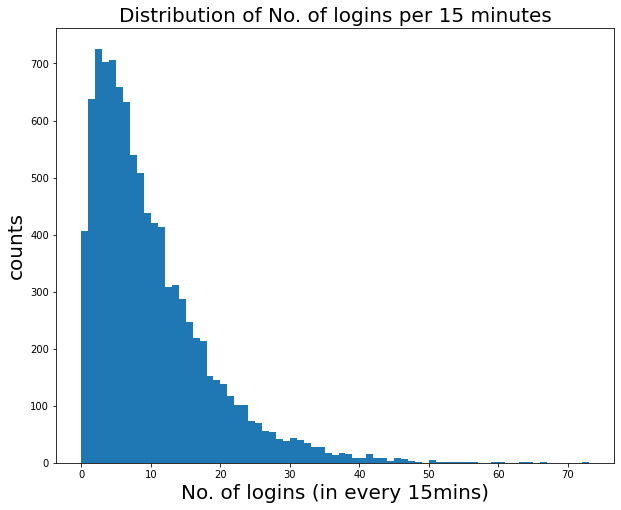

In [13]:
plt.figure(figsize = (10,8))
plt.hist(x = logins_15mins_dataframe.counts, bins = 73)
plt.title("Distribution of No. of logins per 15 minutes", fontdict = {'fontsize': 20 })
plt.xlabel('No. of logins (in every 15mins)', fontdict = {'fontsize': 20 })
plt.ylabel('counts', fontdict = {'fontsize': 20 })
plt.show()

In [14]:
# see the trend for 7 days period
logins_15mins_dataframe2 = logins_15mins_dataframe.loc['1970-01-01 20:00:00': '1970-01-07 23:45:00']
logins_15mins_dataframe2.head()

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [15]:
logins_15mins_dataframe2.tail()

,counts
login_time,
1970-01-07 22:45:00,10
1970-01-07 23:00:00,19
1970-01-07 23:15:00,7
1970-01-07 23:30:00,6
1970-01-07 23:45:00,11


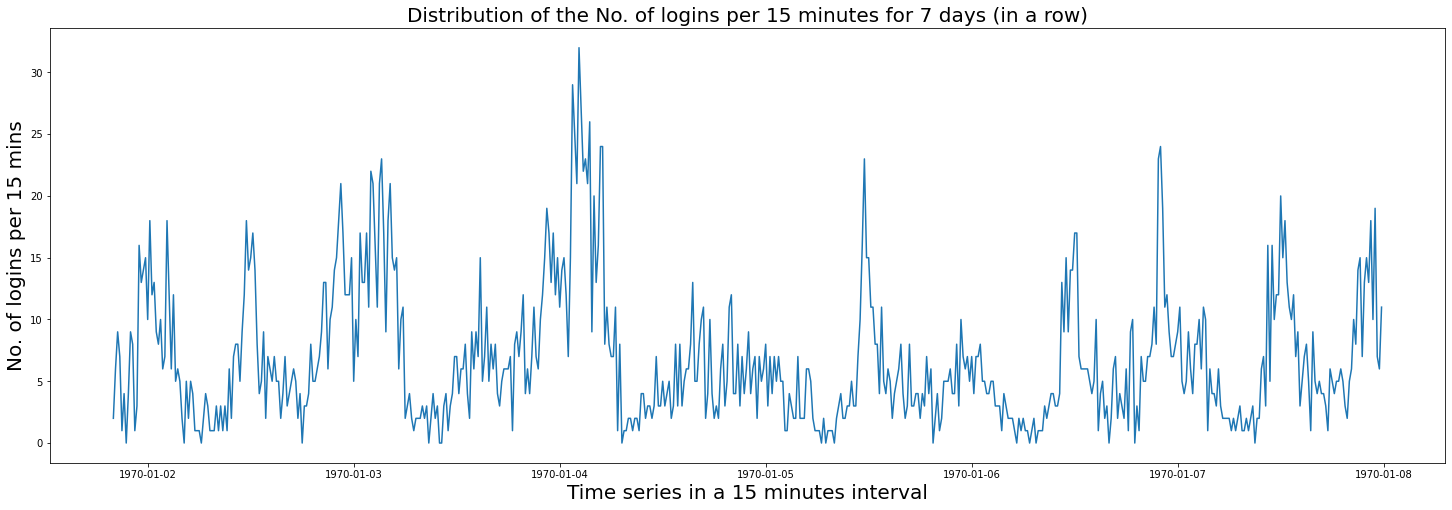

In [16]:
plt.figure(figsize = (25, 8))
plt.plot(logins_15mins_dataframe2.index, logins_15mins_dataframe2.counts)
#plt.scatter(x = logins_15mins_dataframe2.index, y = logins_15mins_dataframe2.counts, color = 'r')
plt.title("Distribution of the No. of logins per 15 minutes for 7 days (in a row)", fontdict = {'fontsize': 20 })
plt.xlabel("Time series in a 15 minutes interval", fontdict = {'fontsize': 20 })
plt.ylabel("No. of logins per 15 mins", fontdict = {'fontsize': 20 })
plt.show()

In [17]:
logins_15mins_dataframe3 = logins_15mins_dataframe.loc['1970-01-01 20:00:00': '1970-01-03 23:45:00']

In [18]:
logins_15mins_dataframe3.head(30)

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


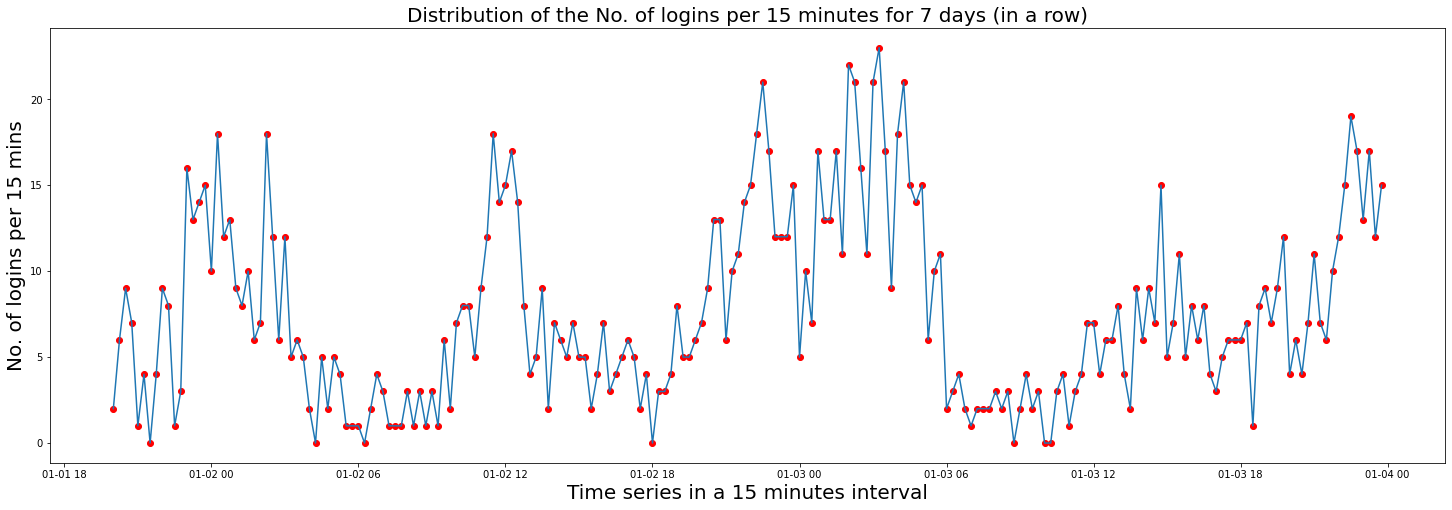

In [19]:
plt.figure(figsize = (25, 8))
plt.plot(logins_15mins_dataframe3.index, logins_15mins_dataframe3.counts)
plt.scatter(x = logins_15mins_dataframe3.index, y = logins_15mins_dataframe3.counts, color = 'r')
plt.title("Distribution of the No. of logins per 15 minutes for 7 days (in a row)", fontdict = {'fontsize': 20 })
plt.xlabel("Time series in a 15 minutes interval", fontdict = {'fontsize': 20 })
plt.ylabel("No. of logins per 15 mins", fontdict = {'fontsize': 20 })
plt.show()

**Note: From this plot, it seems there is no particular pattern and mostly No. of logins in every 15 minutes is random.**  

In [20]:
# Calculate the 25th percentile of the distribution (i.e distribution of No. of logins per 15 minutes)
a = np.array(logins_15mins_dataframe.counts)
np.percentile(a, 2.5)

0.0

In [21]:
# Calculate the 97.5th percentile of the distribution
np.percentile(a, 97.5)

32.0

# Case-2: Logins per day

In [22]:
logins_per_day = logins_15mins_dataframe.resample('D').sum()
logins_per_day.head(15)

,counts
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459
1970-01-06,536
1970-01-07,648
1970-01-08,625
1970-01-09,881


In [23]:
logins_per_day['Day'] = logins_per_day.index.day_name()
logins_per_day.head(30)

,counts,Day
login_time,,
1970-01-01,112,Thursday
1970-01-02,681,Friday
1970-01-03,793,Saturday
1970-01-04,788,Sunday
1970-01-05,459,Monday
1970-01-06,536,Tuesday
1970-01-07,648,Wednesday
1970-01-08,625,Thursday
1970-01-09,881,Friday


In [24]:
logins_per_day.counts.describe()

count     103.000000
mean      904.291262
std       347.167463
min       112.000000
25%       643.000000
50%       827.000000
75%      1141.000000
max      1889.000000
Name: counts, dtype: float64

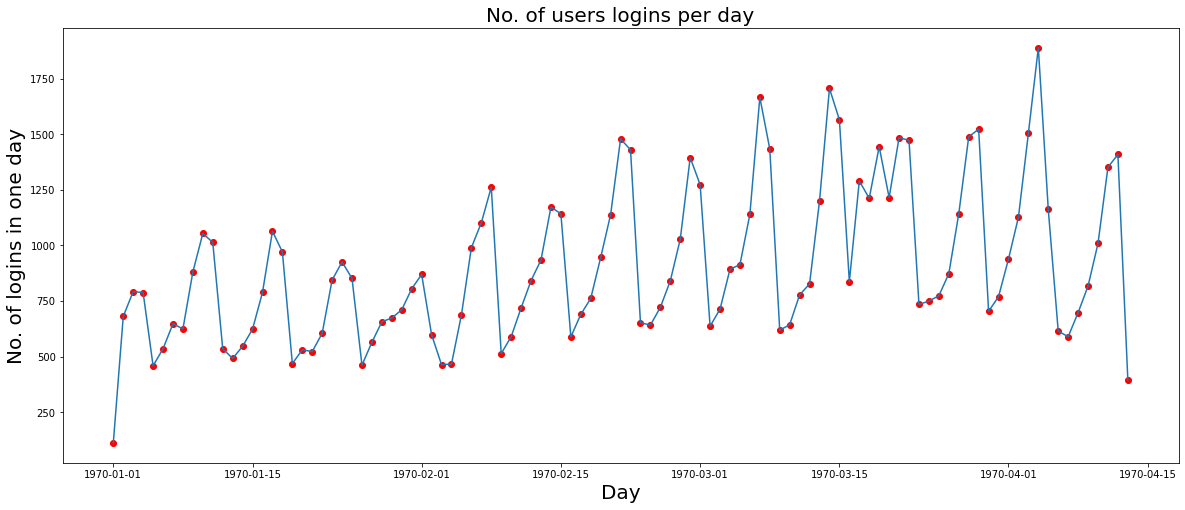

In [25]:
# Show the distribution of the no.of logins per day
plt.figure(figsize = (20, 8))
plt.scatter(logins_per_day.index, logins_per_day.counts, color = 'r')
plt.plot(logins_per_day.index, logins_per_day.counts)
plt.title("No. of users logins per day", fontdict = {'fontsize': 20 })
plt.xlabel('Day', fontdict = {'fontsize': 20 })
plt.ylabel('No. of logins in one day', fontdict = {'fontsize': 20 })
plt.show()

**Note: It looks, the cycle repeats every 7 days.** 

In [26]:
logins_per_day['Login_date_with_name'] = logins_per_day.index.astype(str) + (" ") + logins_per_day.Day.astype(str)
logins_per_day.head()

,counts,Day,Login_date_with_name
login_time,,,
1970-01-01,112,Thursday,1970-01-01 Thursday
1970-01-02,681,Friday,1970-01-02 Friday
1970-01-03,793,Saturday,1970-01-03 Saturday
1970-01-04,788,Sunday,1970-01-04 Sunday
1970-01-05,459,Monday,1970-01-05 Monday


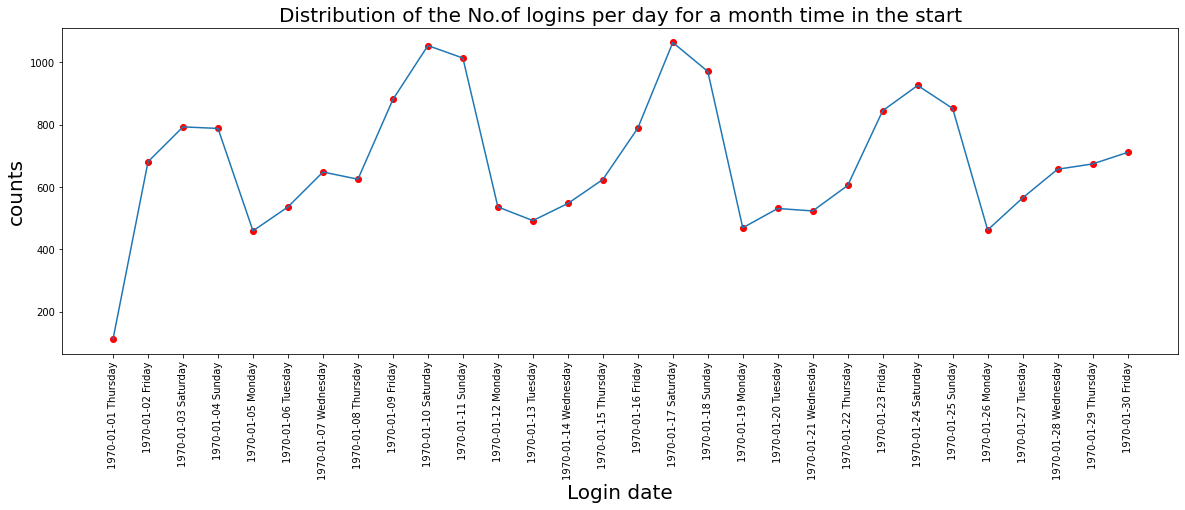

In [27]:
plt.figure(figsize = (20, 6))
plt.scatter(logins_per_day.Login_date_with_name[:30], logins_per_day.counts[:30], color = 'r')
plt.plot(logins_per_day.Login_date_with_name[:30], logins_per_day.counts[:30])
plt.xticks(rotation = 90)
plt.title("Distribution of the No.of logins per day for a month time in the start", fontdict= {'fontsize': 20})
plt.xlabel("Login date", fontdict= {'fontsize': 20})
plt.ylabel('counts', fontdict= {'fontsize': 20})
plt.show()

**Note: The cycle repeats in every week with maximum on saturday.**

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


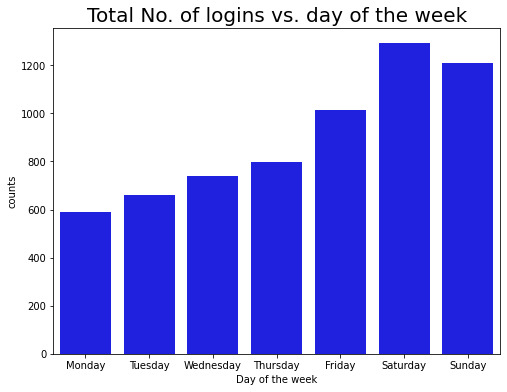

In [28]:
plt.figure(figsize = (8, 6))
sns.barplot(logins_per_day.Day, logins_per_day.counts, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ci = None, color = 'blue')
plt.title("Total No. of logins vs. day of the week", fontdict = {'fontsize': 20})
plt.xlabel("Day of the week")
plt.ylabel('counts')
plt.show()

In [29]:
logins_per_day.head()

,counts,Day,Login_date_with_name
login_time,,,
1970-01-01,112,Thursday,1970-01-01 Thursday
1970-01-02,681,Friday,1970-01-02 Friday
1970-01-03,793,Saturday,1970-01-03 Saturday
1970-01-04,788,Sunday,1970-01-04 Sunday
1970-01-05,459,Monday,1970-01-05 Monday


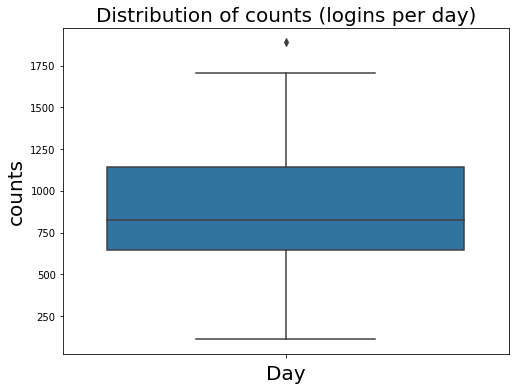

In [30]:
# plot a box plot to show the above distribution
plt.figure(figsize = (8, 6))
sns.boxplot(y = logins_per_day.counts, data = logins_per_day)
plt.title("Distribution of counts (logins per day)", fontdict = {'fontsize': 20 })
plt.xlabel('Day', fontdict = {'fontsize': 20 })
plt.ylabel('counts', fontdict = {'fontsize': 20 })
plt.show()

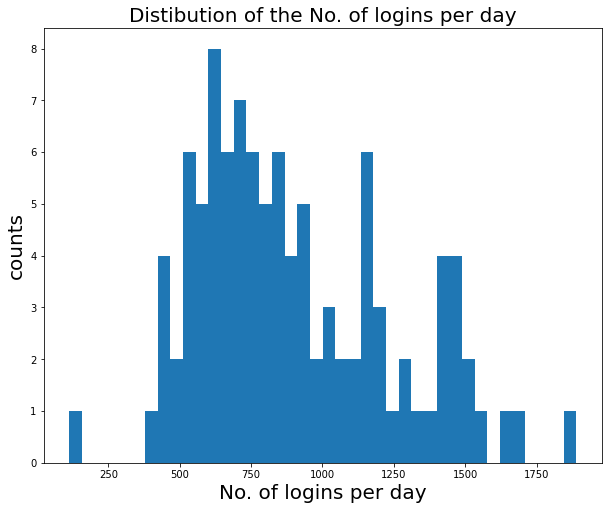

In [31]:
plt.figure(figsize = (10,8))
plt.hist(x = logins_per_day.counts, bins = 40)
plt.title("Distibution of the No. of logins per day", fontdict = {'fontsize': 20 })
plt.xlabel('No. of logins per day', fontdict = {'fontsize': 20 })
plt.ylabel('counts', fontdict = {'fontsize': 20 })
plt.show()

In [32]:
# Calculate the 25th percentile of the distribution (i.e distribution of No. of logins per day)
b = np.array(logins_per_day.counts)
np.percentile(b, 2.5)

460.65

In [33]:
# Calculate the 97.5th percentile of the distribution (i.e distribution of No. of logins per day)
np.percentile(b, 97.5)

1610.4500000000003

# Summary:

**The no. of logins vary in every 15 minutes, it can be zero or reach upto 73, with an average logins of 10. The 95% confidence interval of the no. of logins lies between 0-32. When "counts for every 15 minutes" data was plotted for 7 days (and 3 days) in a row, we didn't see any fixed pattern, however there are some arbitrary peaks in between.** <br><br>

**In the case of no. of logins per day, the counts vary with a minimum of 112 and maximum 1889 with a daily average of 904. The 95% confidence interval of no. of logins lies between (460-1610). The logins counts repeats every week with maximum number of logins taking place in the weekend with highest on every Saturday.**